In [541]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [542]:
data = pd.read_csv('data/train.csv')
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


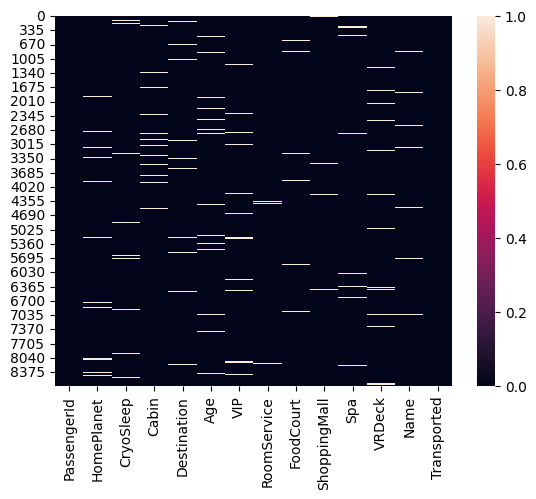

In [543]:
#Heatmap for null values
sns.heatmap(data.isnull())
plt.show()

In [544]:
data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [545]:
data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [546]:
#Missing values
value_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
data[value_cols] = data[value_cols].fillna(0)


In [547]:
#Age missing vlaue = median fill
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
data['Age'].fillna(data['Age'].median(), inplace=True)

/var/folders/bj/p18ygv1s6wbg6865d00fd5h80000gn/T/ipykernel_8798/1822261522.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)


In [548]:
#Categorical values
categorical_data = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
for col in categorical_data:
    data[categorical_data] = data[categorical_data].fillna('Unknown')

In [549]:
#Cabin split
cabin = data['Cabin'].str.split('/', expand=True)
data['Deck'] = cabin[0]
data['CabinNumber'] = cabin[1]
data['Side'] = cabin[2]

#Fillna
data['Deck'] = data['Deck'].fillna('U')
data['CabinNumber'] = data['CabinNumber'].fillna(1)
data['Side'] = data['Side'].fillna('U')

#Drop cabin and name
data = data.drop(['Cabin', 'Name', 'PassengerId'], axis=1)

In [550]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   object 
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   object 
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   bool   
 11  Deck          8693 non-null   object 
 12  CabinNumber   8693 non-null   object 
 13  Side          8693 non-null   object 
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [551]:
data.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Deck            0
CabinNumber     0
Side            0
dtype: int64

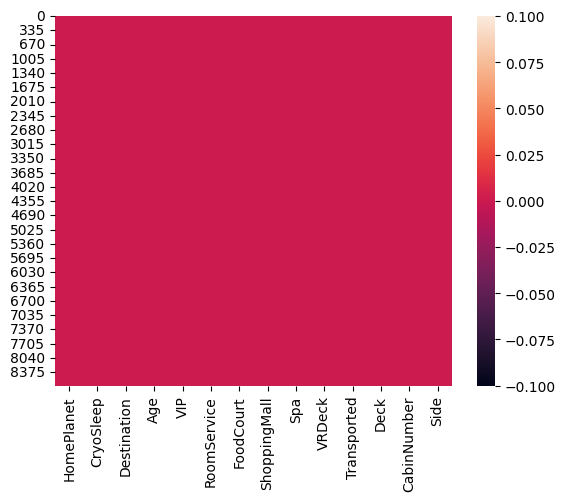

In [552]:
sns.heatmap(data.isnull())
plt.show()

In [553]:
data

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,CabinNumber,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,98,P
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,1499,S
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,1500,S
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,E,608,S


In [554]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   object 
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   object 
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   bool   
 11  Deck          8693 non-null   object 
 12  CabinNumber   8693 non-null   object 
 13  Side          8693 non-null   object 
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [555]:
#Data embedding
print(data['HomePlanet'].value_counts())
print(data['Destination'].value_counts())

HomePlanet
Earth      4602
Europa     2131
Mars       1759
Unknown     201
Name: count, dtype: int64
Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Unknown           182
Name: count, dtype: int64


In [556]:
data = pd.get_dummies(data, columns=['HomePlanet', 'Destination'])

In [557]:
data

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,CabinNumber,Side,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Unknown,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_Unknown
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P,False,True,False,False,False,False,True,False
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S,True,False,False,False,False,False,True,False
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S,False,True,False,False,False,False,True,False
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S,False,True,False,False,False,False,True,False
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,98,P,False,True,False,False,True,False,False,False
8689,True,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,1499,S,True,False,False,False,False,True,False,False
8690,False,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,1500,S,True,False,False,False,False,False,True,False
8691,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,E,608,S,False,True,False,False,True,False,False,False


In [558]:
data['VIP'] = data['VIP'].astype('bool')
data['CryoSleep'] = data['CryoSleep'].astype('bool')
data['Age'] = data['Age'].astype(int)
data['CabinNumber'] = data['CabinNumber'].astype('int')

data = pd.get_dummies(data, columns=['Deck', 'Side'])
data

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CabinNumber,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U,Side_P,Side_S,Side_U
0,False,39,False,0.0,0.0,0.0,0.0,0.0,False,0,...,False,False,False,False,False,False,False,True,False,False
1,False,24,False,109.0,9.0,25.0,549.0,44.0,True,0,...,False,False,False,True,False,False,False,False,True,False
2,False,58,True,43.0,3576.0,0.0,6715.0,49.0,False,0,...,False,False,False,False,False,False,False,False,True,False
3,False,33,False,0.0,1283.0,371.0,3329.0,193.0,False,0,...,False,False,False,False,False,False,False,False,True,False
4,False,16,False,303.0,70.0,151.0,565.0,2.0,True,1,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,41,True,0.0,6819.0,0.0,1643.0,74.0,False,98,...,False,False,False,False,False,False,False,True,False,False
8689,True,18,False,0.0,0.0,0.0,0.0,0.0,False,1499,...,False,False,False,False,True,False,False,False,True,False
8690,False,26,False,0.0,0.0,1872.0,1.0,0.0,True,1500,...,False,False,False,False,True,False,False,False,True,False
8691,False,32,False,0.0,1049.0,0.0,353.0,3235.0,False,608,...,False,False,True,False,False,False,False,False,True,False


In [559]:
bool_columns = data.select_dtypes(include='bool').columns
data[bool_columns] = data[bool_columns].astype(int)

In [560]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8693 non-null   int64  
 1   Age                        8693 non-null   int64  
 2   VIP                        8693 non-null   int64  
 3   RoomService                8693 non-null   float64
 4   FoodCourt                  8693 non-null   float64
 5   ShoppingMall               8693 non-null   float64
 6   Spa                        8693 non-null   float64
 7   VRDeck                     8693 non-null   float64
 8   Transported                8693 non-null   int64  
 9   CabinNumber                8693 non-null   int64  
 10  HomePlanet_Earth           8693 non-null   int64  
 11  HomePlanet_Europa          8693 non-null   int64  
 12  HomePlanet_Mars            8693 non-null   int64  
 13  HomePlanet_Unknown         8693 non-null   int64

In [561]:
data

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CabinNumber,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U,Side_P,Side_S,Side_U
0,0,39,0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,24,0,109.0,9.0,25.0,549.0,44.0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,58,1,43.0,3576.0,0.0,6715.0,49.0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,33,0,0.0,1283.0,371.0,3329.0,193.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,16,0,303.0,70.0,151.0,565.0,2.0,1,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,41,1,0.0,6819.0,0.0,1643.0,74.0,0,98,...,0,0,0,0,0,0,0,1,0,0
8689,1,18,0,0.0,0.0,0.0,0.0,0.0,0,1499,...,0,0,0,0,1,0,0,0,1,0
8690,0,26,0,0.0,0.0,1872.0,1.0,0.0,1,1500,...,0,0,0,0,1,0,0,0,1,0
8691,0,32,0,0.0,1049.0,0.0,353.0,3235.0,0,608,...,0,0,1,0,0,0,0,0,1,0


In [562]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [563]:
X = data.drop('Transported', axis=1)
y = data['Transported']

In [564]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)
#For Pytorch
N, D = X_train.shape
print(X_train.size)
print(X_test.size)
print(y_train.size)
print(y_test.size)

201666
50431
6954
1739


In [565]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}
rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                 
    scoring='accuracy',   
    n_jobs=-1,           
    verbose=2
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5,

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [566]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation score: 0.804574629297281


In [567]:
y_pred = grid_search.best_estimator_.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, y_pred))

Test accuracy: 0.8136860264519838


PyTorch

In [568]:
from sklearn.preprocessing import StandardScaler
import torch
from torch import nn

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
N, D = X_train.shape

In [569]:
#Build model
model = nn.Sequential(
    nn.Linear(D, 1),
    nn.Sigmoid())

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

In [570]:
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))

# Convert y (targets) to tensors and reshape to column vectors
y_train = torch.from_numpy(y_train.to_numpy().astype(np.float32).reshape(-1, 1))
y_test = torch.from_numpy(y_test.to_numpy().astype(np.float32).reshape(-1, 1))

# Confirm shapes
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: torch.Size([6954, 29])
y_train: torch.Size([6954, 1])
X_test: torch.Size([1739, 29])
y_test: torch.Size([1739, 1])


In [571]:
print(type(X_train)) 

<class 'torch.Tensor'>


In [572]:
epochs = 1000
train_losses = np.zeros(epochs)
test_losses = np.zeros(epochs)

for i in range(epochs):
    optimizer.zero_grad()
    
    #Forward pass
    output = model(X_train)
    loss = criterion(output, y_train)
    
    #Backward and optimize
    loss.backward()
    optimizer.step()
    
    #Test loss
    output_test = model(X_test)
    loss_test = criterion(output_test, y_test)
    
    #Save losses
    train_losses[i] = loss.item()
    test_losses[i] = loss_test.item()
    
    if (i + 1) % 50 == 0:
        print(f'Epoch {i+1}/{epochs}, Train loss: {loss.item():4f}, Test loss: {loss_test.item():4f}')

Epoch 50/1000, Train loss: 0.646261, Test loss: 0.645348
Epoch 100/1000, Train loss: 0.610721, Test loss: 0.608068
Epoch 150/1000, Train loss: 0.585428, Test loss: 0.582553
Epoch 200/1000, Train loss: 0.566055, Test loss: 0.563249
Epoch 250/1000, Train loss: 0.550642, Test loss: 0.547919
Epoch 300/1000, Train loss: 0.538045, Test loss: 0.535385
Epoch 350/1000, Train loss: 0.527524, Test loss: 0.524912
Epoch 400/1000, Train loss: 0.518583, Test loss: 0.516016
Epoch 450/1000, Train loss: 0.510887, Test loss: 0.508361
Epoch 500/1000, Train loss: 0.504200, Test loss: 0.501712
Epoch 550/1000, Train loss: 0.498349, Test loss: 0.495893
Epoch 600/1000, Train loss: 0.493201, Test loss: 0.490772
Epoch 650/1000, Train loss: 0.488654, Test loss: 0.486244
Epoch 700/1000, Train loss: 0.484620, Test loss: 0.482222
Epoch 750/1000, Train loss: 0.481031, Test loss: 0.478636
Epoch 800/1000, Train loss: 0.477827, Test loss: 0.475428
Epoch 850/1000, Train loss: 0.474957, Test loss: 0.472546
Epoch 900/1000,

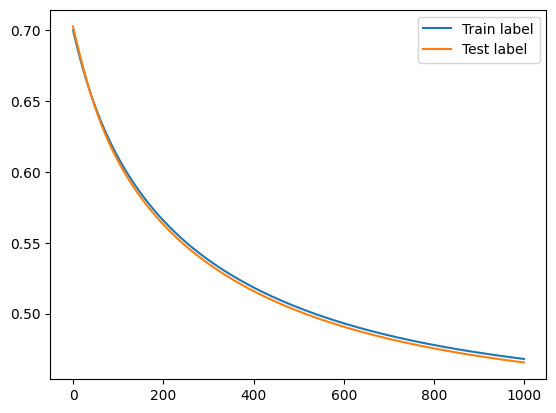

In [573]:
plt.plot(train_losses, label = 'Train label')
plt.plot(test_losses, label = 'Test label')
plt.legend()
plt.show()

In [574]:
#Check accuracy
with torch.no_grad():
    p_train = model(X_train)
    p_train = np.round(p_train.numpy())
    train_acc = np.mean(y_train.numpy() == p_train)
    
    p_test = model(X_test)
    p_test = np.round(p_test.numpy())
    test_acc = np.mean(y_test.numpy() == p_test)

print(f'Train accuracy: {train_acc}, Test accuracy: {test_acc}')

Train accuracy: 0.7766752947943629, Test accuracy: 0.7682576193214491
